In [1]:
#Общее число младенцев
import pandas as pd
import numpy as np
import pylab
cols = [ 'name' , 'gender', 'birth']
years = range(1880, 2011)
pieces = []
for i in years:
    df = pd.read_table('C:\\Users\\artem\Desktop\\babynames\\yob%d.txt'%i, sep = ',', engine = 'python' , names = cols)
    df['year'] = i
    pieces.append(df)
    data = pd.concat(pieces, ignore_index = True)
bgend=data.pivot_table('birth', index='gender', aggfunc = 'sum')
bgend

,birth
gender,
F,159990140
M,162412587


In [2]:
#Таблица
data 

,name,gender,birth,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


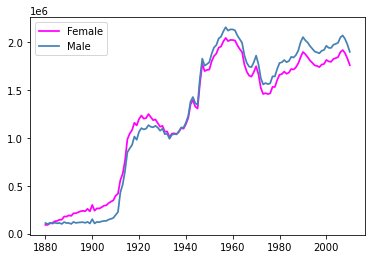

In [3]:
#График по полу
import matplotlib.pyplot as plt
gend=data.pivot_table('birth', index='year', columns='gender', aggfunc = 'sum')
gend
a=gend['F']
b=gend['M']
c=years
plt.plot(c, a, label="Female", color='fuchsia', lw = 1.75)
plt.plot(c, b, label="Male", color='steelblue', lw = 1.75)
plt.legend()
plt.show()

In [4]:
#пропрция 
data['proportion']=data['birth']/sum(data['birth'])
data

,name,gender,birth,year,proportion
0,Mary,F,7065,1880,2.191359e-05
1,Anna,F,2604,1880,8.076855e-06
2,Emma,F,2003,1880,6.212727e-06
3,Elizabeth,F,1939,1880,6.014217e-06
4,Minnie,F,1746,1880,5.415587e-06
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,1.550855e-08
1690780,Zyonne,M,5,2010,1.550855e-08
1690781,Zyquarius,M,5,2010,1.550855e-08
1690782,Zyran,M,5,2010,1.550855e-08


Text(0.5, 1.0, 'Me')

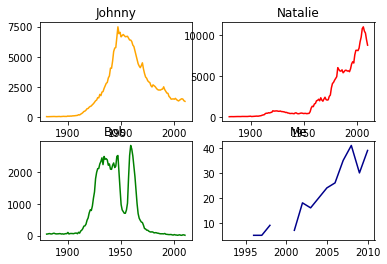

In [5]:
#графикики имен
nam = data.pivot_table('birth', index='year', columns='name', aggfunc='sum')
pylab.subplot (2, 2, 1)
pylab.plot(c, nam['Johnny'], color = 'orange')
pylab.title('Johnny')
pylab.subplot (2, 2, 2)
pylab.plot(c, nam['Natalie'], color = 'red')
pylab.title('Natalie')
pylab.subplot (2, 2, 3)
pylab.plot(c, nam['Bob'], color = 'green')
pylab.title('Bob')
pylab.subplot (2, 2, 4)
pylab.plot(c, nam['Artem'], color = 'darkblue')
pylab.title('Me')

Text(0.5, 1.0, 'Me')

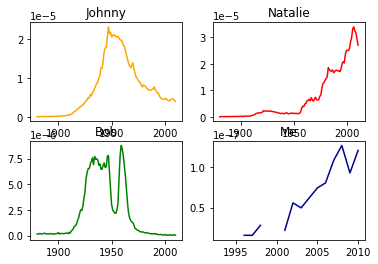

In [6]:
#графики имен относительно общего числа(график пропорции)
nam = data.pivot_table('proportion', index='year', columns='name', aggfunc='sum')
pylab.subplot (2, 2, 1)
pylab.plot(c, nam['Johnny'], color = 'orange')
pylab.title('Johnny')
pylab.subplot (2, 2, 2)
pylab.plot(c, nam['Natalie'], color = 'red')
pylab.title('Natalie')
pylab.subplot (2, 2, 3)
pylab.plot(c, nam['Bob'], color = 'green')
pylab.title('Bob')
pylab.subplot (2, 2, 4)
pylab.plot(c, nam['Artem'], color = 'darkblue')
pylab.title('Me')

In [7]:
#самые популярные имена 
a = []
for i in range(1880,2011):
    top= data[data['year'] == i]
    top.sort_values('birth',ascending=False)
    a.append(top.head(1))
b = pd.concat(a, ignore_index = True)
del b['gender']
del b['proportion']
b

,name,birth,year
0,Mary,7065,1880
1,Mary,6919,1881
2,Mary,8149,1882
3,Mary,8012,1883
4,Mary,9217,1884
...,...,...,...
126,Emily,21365,2006
127,Emily,19322,2007
128,Emma,18765,2008
129,Isabella,22222,2009
